In [9]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Prepare data

In [10]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

## Model

In [11]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

## Loss and optimizer

In [12]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training Loop

In [13]:
num_epochs = 150
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 3965.0737
epoch: 20, loss = 2796.3875
epoch: 30, loss = 1999.7131
epoch: 40, loss = 1456.5177
epoch: 50, loss = 1086.0732
epoch: 60, loss = 833.3890
epoch: 70, loss = 660.9954
epoch: 80, loss = 543.3572
epoch: 90, loss = 463.0677
epoch: 100, loss = 408.2586
epoch: 110, loss = 370.8368
epoch: 120, loss = 345.2818
epoch: 130, loss = 327.8278
epoch: 140, loss = 315.9045
epoch: 150, loss = 307.7581


## Plot

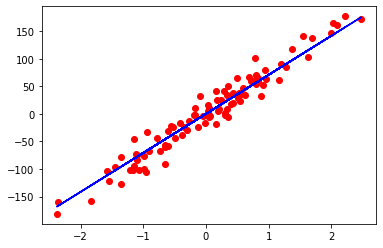

In [14]:
predicted = model(X).detach().numpy()
# we dont want it to be tracked
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()